In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True, edgeitems=5)

pd.set_option('display.max_rows', 200)
pd.set_option('display.min_rows', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
from numpy.random import randn

In [79]:
from scipy.sparse.csgraph import minimum_spanning_tree


def get_tree(N, n_loops, seed) -> list:

    np.random.seed(seed)
    
    x = np.random.randn(N, 1)
    D = squareform(pdist(x))
    A = minimum_spanning_tree(D).toarray().astype(bool)
    A = A + A.T

    for i in range(n_loops - 1):
        
        D = squareform(pdist(x + np.random.randn(N, 1) / 50))
        A_ = minimum_spanning_tree(D).toarray().astype(bool)
        A += (A_ + A_.T)
        
    return A.astype(float)

In [82]:
get_tree(10, 2, 2)

array([[0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]])

In [83]:
True + True

2

In [53]:
N = 10
x = np.random.randn(N, 1)
D = squareform(pdist(x))
mst = np.argwhere(minimum_spanning_tree(D))

A = np.zeros((N, N))

A[mst] = 1

In [68]:
minimum_spanning_tree(squareform(pdist(x))).toarray().astype(bool).astype(int)

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [72]:
minimum_spanning_tree(squareform(pdist(x + np.random.randn(N, 1) / 50))).toarray().astype(bool).astype(int)

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [23]:
D[:, 0] + np.random.randn(N) / 50

array([0.041, 0.479, 0.141, 0.528, 1.262, 0.77 , 0.824, 0.279, 1.196, 0.251, 0.621, 1.597, 0.981, 0.742, 0.087, 1.17 , 0.544, 0.873, 2.205, 1.484, 0.647, 0.844, 0.024, 1.113, 1.458, 1.943, 0.15 , 0.608, 1.26 , 0.01 , 1.397, 2.254, 2.831, 0.556, 2.641, 1.883, 0.332, 0.525, 0.266, 0.661, 0.897, 2.207, 1.579, 0.497, 0.808, 0.167, 0.453, 1.352, 0.253, 2.08 , 1.598, 0.597, 0.808, 0.535, 0.584, 2.261, 0.292, 0.889, 0.31 , 0.198, 0.594, 0.032, 0.49 , 0.769, 1.102, 2.018, 0.367, 0.764, 0.061, 0.779,
       0.653, 0.474, 0.986, 0.786, 1.18 , 0.325, 0.135, 1.438, 1.392, 0.155, 1.934, 0.004, 2.129, 1.182, 1.251, 1.158, 0.64 , 1.313, 1.065, 0.492, 1.306, 2.395, 1.327, 0.29 , 0.139, 1.98 , 0.826, 0.045, 0.357, 2.259])

In [25]:
np.random.randn(N) / 50

array([ 0.009, -0.013,  0.007,  0.001,  0.023, -0.025,  0.002,  0.003, -0.022, -0.023, -0.017, -0.004,  0.03 ,  0.007,  0.032,  0.003, -0.002, -0.021, -0.005,  0.026, -0.004, -0.026, -0.032, -0.013,  0.033, -0.025,  0.017, -0.012,  0.032, -0.015, -0.002, -0.006,  0.008,  0.014,  0.003,  0.026,  0.002, -0.01 ,  0.024,  0.005,  0.005, -0.003, -0.033,  0.015,  0.054,  0.06 ,  0.022,  0.034, -0.016,  0.011,  0.013,  0.002,  0.015,  0.003,  0.018, -0.046,  0.013,  0.   ,  0.   ,  0.002, -0.005,
       -0.001,  0.002, -0.002, -0.005,  0.005,  0.002,  0.014, -0.023,  0.001, -0.002, -0.002,  0.014, -0.004, -0.024,  0.022,  0.006,  0.014, -0.011,  0.018,  0.006,  0.014, -0.008,  0.013, -0.003,  0.001,  0.004, -0.004,  0.026,  0.024, -0.007, -0.003,  0.004, -0.008, -0.005, -0.023,  0.032,  0.021,  0.029,  0.03 ])

In [3]:
import sys
sys.path.append('.')

In [31]:
from graph.graphs import Graph, ProductGraph
from graph.filters import GraphFilter, SpaceTimeGraphFilter
from models.smoothing import smooth_graph_signal

<IPython.core.display.Javascript object>


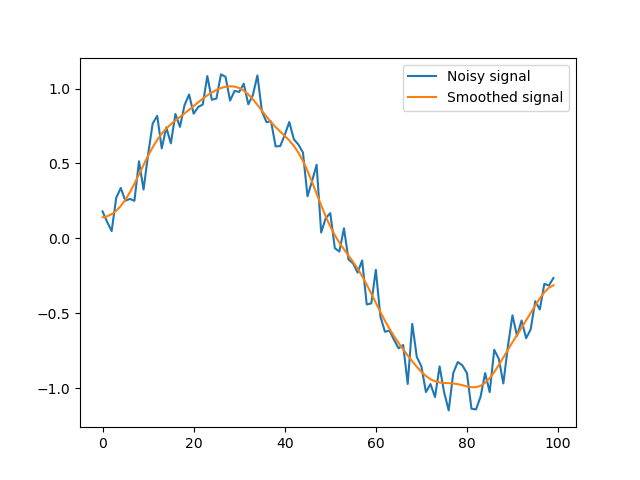

interactive(children=(FloatSlider(value=-7.0, description='logγ', max=0.0, min=-10.0, step=0.05), Output()), _…

interactive(children=(FloatSlider(value=3.0, description='logβ', max=4.0, min=-1.0, step=0.05), Output()), _do…

<function __main__.update_beta(logβ=3)>

In [91]:
from ipywidgets import interact

fig, ax = plt.subplots()

N = 100
g1 = Graph.chain(N)

x = np.sin(np.linspace(0, 6, N)) + randn(N) / 10

gamma = 1
beta = 1
filt = GraphFilter.diffusion(beta=beta)

x_ = smooth_graph_signal(x, graph=g1, filter=filt, gamma=gamma)

plt.plot(x, label='Noisy signal')
line, = ax.plot(x_, label='Smoothed signal')
plt.legend()

def update_gamma(logγ=-7):
    global gamma
    gamma = np.exp(logγ)
    x_ = smooth_graph_signal(x, graph=g1, filter=filt, gamma=gamma)
    line.set_ydata(x_)
    fig.canvas.draw_idle()
    
    
def update_beta(logβ=3):
    global filt
    filt = GraphFilter.diffusion(beta=np.exp(logβ))
    x_ = smooth_graph_signal(x, graph=g1, filter=filt, gamma=gamma)
    line.set_ydata(x_)
    fig.canvas.draw_idle()
    
    
interact(update_gamma, logγ=(-10, 0, 0.05))
interact(update_beta, logβ=(-1, 4, 0.05))

<IPython.core.display.Javascript object>


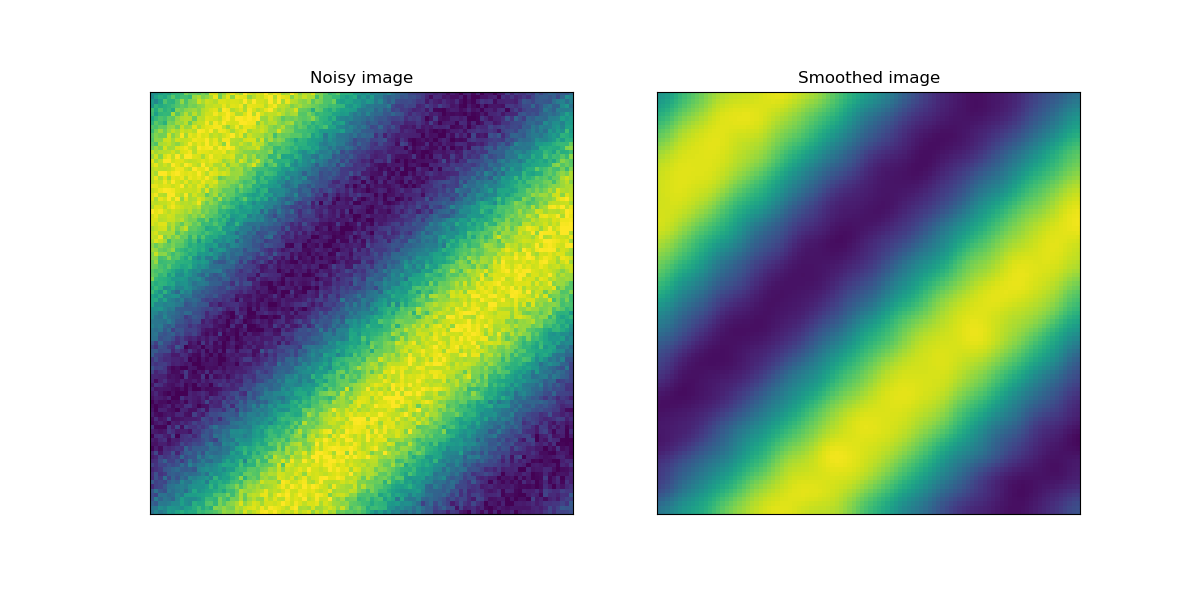

interactive(children=(FloatSlider(value=-5.0, description='logγ', max=1.0, min=-10.0, step=0.05), Output()), _…

interactive(children=(FloatSlider(value=0.0, description='logβ', max=5.0, min=-2.0, step=0.05), Output()), _do…

<function __main__.update_beta(logβ=0)>

In [92]:
from ipywidgets import interact

fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
axes[0].set_title('Noisy image')
axes[1].set_title('Smoothed image')

N1 = 100
N2 = 100

g2 = ProductGraph.lattice(N1, N2)

x = np.sin(sum(np.meshgrid(np.linspace(0, 6, N1), np.linspace(0, 6, N2)))) + randn(N1, N2) / 10

gamma = 1
beta = 1
filt = GraphFilter.diffusion(beta=beta)

x_ = smooth_graph_signal(x, graph=g2, filter=filt, gamma=gamma)

axes[0].imshow(x, vmin=-1.1, vmax=1.1)
im = axes[1].imshow(x_, vmin=-1.1, vmax=1.1)

def update_gamma(logγ=-5):
    global gamma
    gamma = np.exp(logγ)
    x_ = smooth_graph_signal(x, graph=g2, filter=filt, gamma=gamma)
    im.set(data=x_)
    fig.canvas.draw_idle()
    
    
def update_beta(logβ=0):
    global filt
    filt = GraphFilter.diffusion(beta=np.exp(logβ))
    x_ = smooth_graph_signal(x, graph=g2, filter=filt, gamma=gamma)
    im.set(data=x_)
    fig.canvas.draw_idle()

    
interact(update_gamma, logγ=(-10, 1, 0.05))
interact(update_beta, logβ=(-2, 5, 0.05))